# Dataset

Download dataset

In [10]:
import os
if not os.path.isfile('dognition_data_aggregated_by_dogid.xlsx'):
  ! gdown 1aqPah5aYlkvTiT9MLrOVfC4_NZYBQT0q

Load and dispaly dataset

In [11]:
import pandas as pd

# Load the dognition_data_aggregated_by_dogid dataset
data_path = 'dognition_data_aggregated_by_dogid.xlsx'
dognition_data = pd.read_excel(data_path)

# Display the first few rows of the dataset to understand its structure
dognition_data.head()


,Dog ID,Total Tests Completed,Mean ITI (days),Mean ITI (minutes),Median ITI (days),Median ITI (minutes),Time diff between first and last game (days),Time diff between first and last game (minutes),User ID,Gender,...,Membership_ID,Subscribed,City,State,Zip,Country,Exclude,Free_Start_User,Last_Active_At,Membership_Type
0,fd27b272-7144-11e5-ba71-058fbc01cf0b,21,28.201076,40609.549167,0.004687,6.750000,564.021516,812190.983333,ce134e42-7144-11e5-ba71-058fbc01cf0b,female,...,2.0,1.0,Grand Forks,ND,58201,US,0,0,2015-03-12 00:25:00,2
1,fd27b5ba-7144-11e5-ba71-058fbc01cf0b,20,0.413307,595.162281,0.005845,8.416667,7.852836,11308.083333,ce1353d8-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Barre,MA,01005,US,0,0,00:00:00,1
2,fd27b6b4-7144-11e5-ba71-058fbc01cf0b,2,0.009132,13.150000,0.009132,13.150000,0.009132,13.150000,ce135ab8-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Darien,CT,06820,US,0,0,00:00:00,1
3,fd27b79a-7144-11e5-ba71-058fbc01cf0b,11,56.115179,80805.858333,0.004433,6.383333,561.151794,808058.583333,ce13507c-7144-11e5-ba71-058fbc01cf0b,male,...,1.0,1.0,Winnetka,IL,60093,US,0,0,2014-09-12 19:26:00,1
4,fd27b86c-7144-11e5-ba71-058fbc01cf0b,31,7.734254,11137.326111,0.000399,0.575000,232.027627,334119.783333,ce135e14-7144-11e5-ba71-058fbc01cf0b,female,...,2.0,1.0,Raleigh,NC,27606,US,1,0,00:00:00,2


# Exercise 1



## Counting Unique Dogs and Users:

Let's start by calculating the number of unique Dog IDs and User IDs in the dataset.

In [12]:
# Calculate the number of unique Dog IDs and User IDs
unique_dogs_count = dognition_data['Dog ID'].nunique()
unique_users_count = dognition_data['User ID'].nunique()

unique_dogs_count, unique_users_count

(17986, 16261)

1. **Number of Unique Dogs**: The dataset contains **17,986** unique dogs.
2. **Number of Unique Users**: There are **16,261** unique human users in the dataset.

The difference in the number of unique Dog IDs and User IDs suggests that some users have registered more than one dog. This could be important for understanding user behavior and the usage patterns of the platform.

## Analyzing Countries and States
Analyze Country and State data to understand the geographical distribution and identify any anomalies.


Let's start by analyzing the country and state data. We'll identify the unique countries and states represented in the dataset, count them, and look for any unusual values in the state data. Then, we'll move on to examining the sign-in counts.



In [13]:
# Analyzing Country data
unique_countries = dognition_data['Country'].nunique()
country_counts = dognition_data['Country'].value_counts()

# Analyzing State data
unique_states = dognition_data['State'].nunique()
state_counts = dognition_data['State'].value_counts()

unique_countries, unique_states, country_counts.head(), state_counts.head(10)

(68,
 290,
 US    10310
 CA      551
 AU      169
 GB      158
 DE       45
 Name: Country, dtype: int64,
 CA    1548
 NY     696
 NC     637
 TX     625
 FL     575
 VA     432
 WA     372
 PA     371
 IL     361
 CO     323
 Name: State, dtype: int64)

1. **Countries**:
   - The dataset includes dogs from **68 unique countries**.
   - The top five countries by the number of entries are:
     - United States (US): 10,310 entries
     - Canada (CA): 551 entries
     - Australia (AU): 169 entries
     - Great Britain (GB): 158 entries
     - Germany (DE): 45 entries

2. **States**:
   - There are **290 unique state entries** in the dataset.
   - The top ten states by the number of entries are:
     - California (CA): 1,548 entries
     - New York (NY): 696 entries
     - North Carolina (NC): 637 entries
     - Texas (TX): 625 entries
     - Florida (FL): 575 entries
     - Virginia (VA): 432 entries
     - Washington (WA): 372 entries
     - Pennsylvania (PA): 371 entries
     - Illinois (IL): 361 entries
     - Colorado (CO): 323 entries

Given the high number of unique states (290), which is much more than the typical number of regions in any given country, it suggests that the "State" field may contain some erroneous or non-standard entries.





## Analysis of Sign In Counts
Examine Sign in Count to detect outliers, particularly focusing on the high sign-in counts which could indicate test accounts.


I will examine the "Sign in Count" field to identify any outliers and specifically look at accounts with an unusually high number of sign-ins, which could indicate test accounts.

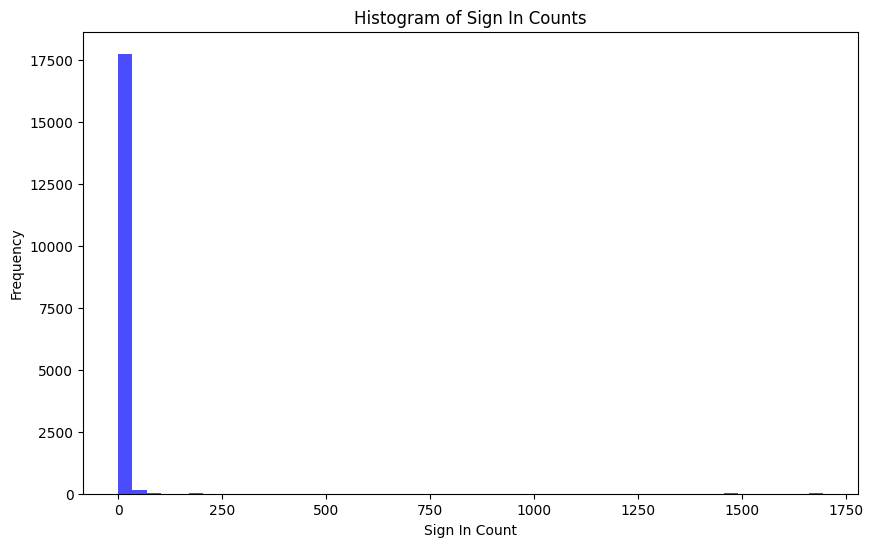

(50,
 50,
                                   Dog ID  Sign_in_Count
 4   fd27b86c-7144-11e5-ba71-058fbc01cf0b          181.0
 6   fd27ba1a-7144-11e5-ba71-058fbc01cf0b          181.0
 43  fd27e9a4-7144-11e5-ba71-058fbc01cf0b          181.0
 45  fd27ed46-7144-11e5-ba71-058fbc01cf0b          181.0
 61  fd3ccf2c-7144-11e5-ba71-058fbc01cf0b          355.0)

In [14]:
import matplotlib.pyplot as plt

# Analyzing Sign in Count for outliers
signin_counts = dognition_data['Sign_in_Count']

# Plotting a histogram for Sign_in_Count
plt.figure(figsize=(10, 6))
plt.hist(signin_counts, bins=50, color='blue', alpha=0.7)
plt.xlabel('Sign In Count')
plt.ylabel('Frequency')
plt.title('Histogram of Sign In Counts')
plt.show()

# Identifying potential outliers (e.g., Sign In Count greater than 175)
outlier_threshold = 175
outlier_signins = dognition_data[dognition_data['Sign_in_Count'] > outlier_threshold]

outlier_signins_count = outlier_signins.shape[0]
outlier_dog_ids = outlier_signins['Dog ID'].nunique()

outlier_signins_count, outlier_dog_ids, outlier_signins[['Dog ID', 'Sign_in_Count']].head()



1. **Histogram Overview**:
   - The histogram of sign-in counts shows a distribution skewed towards lower counts, with a few outliers having very high sign-in counts.

2. **Outliers Analysis**:
   - There are **50 entries** with a sign-in count greater than 175.
   - These entries correspond to **50 unique Dog IDs**.
   - Example entries with high sign-in counts include Dog IDs with counts like 181 and even as high as 355.

# Exercise 2



# Exercise 3

# Exercise 4


# Exercise 4

